In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , f1_score ,recall_score , precision_score,accuracy_score ,confusion_matrix ,roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
#import mlxtend
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.decomposition import pca
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
%matplotlib inline
hyper = pd.read_csv('export_CKD5-7-11AllFeatures.csv').drop('id',axis=1)
feature_names = ['age', 'bp', 'sg', 'al' , 'su' , 'rbc' , 'pc' , 'pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn',
                'dm','cad','appet','pe','ane']
#X = hyper[feature_names]
#y = hyper['hyper']
print(hyper.head())
print("dimension of Hypertension data: {}".format(hyper.shape))

X = hyper.drop('classification',1)
y = hyper['classification']


    age    bp     sg   al   su  rbc  pc  pcc  ba         bgr  ...   pcv  \
0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  121.000000  ...  44.0   
1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  148.036517  ...  38.0   
2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.000000  ...  31.0   
3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.000000  ...  32.0   
4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  106.000000  ...  35.0   

       wc      rc  htn  dm  cad  appet  pe  ane  classification  
0  7800.0  5.2000    1   1    0      1   0    0               1  
1  6000.0  4.7074    0   0    0      1   0    0               1  
2  7500.0  4.7074    0   1    0      2   0    1               1  
3  6700.0  3.9000    1   0    0      2   1    1               1  
4  7300.0  4.6000    0   0    0      1   0    0               1  

[5 rows x 25 columns]
dimension of Hypertension data: (400, 25)


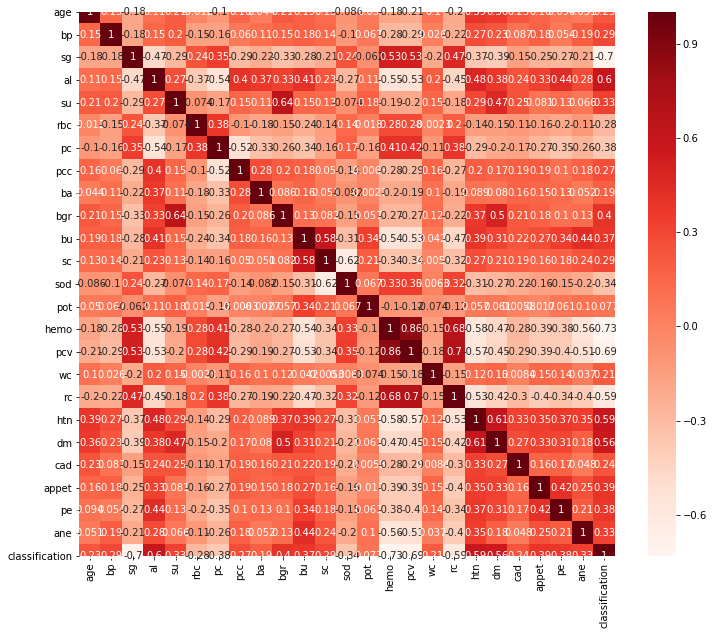

In [3]:
plt.figure(figsize=(12,10))
cor = hyper.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
corr_matrix = hyper.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95

    
to_drop = [column for column in upper.columns if any(upper[column] > 0.50 )] 

   


X1=hyper.drop(to_drop,axis=1,inplace=True)
print(hyper.columns)
#print(hyper.head())
# Drop features 
#print(hyper.columns)
#print("dimension of Hypertension data: {}".format(hyper.shape))
#print(hyper.groupby('classification').size())


Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'ba', 'bu', 'pot', 'wc', 'cad',
       'appet', 'pe'],
      dtype='object')


In [5]:
LR= LogisticRegression()
KNN= KNeighborsClassifier()
CART= DecisionTreeClassifier()
NB= GaussianNB()
SVM= SVC(kernel='linear',random_state=42)
MLP=MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=20,random_state=1)
DT=DecisionTreeClassifier(random_state=42)
RF=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=30,random_state=7)
def model(model,X_tr, X_te, y_tr, y_te):
    model.fit(X_tr,y_tr)
    predict=model.predict(X_te)
    mae = np.mean(abs(predict - y_te))
    print('MAE = %0.4f' % mae)
    confusion_matrix(y_te, predict)
    print('accuracy score',accuracy_score(y_te,predict)*100)
    print('Classification report \n')
    print(classification_report(y_te,predict))
    print("Train acc: ",accuracy_score(y_tr,model.predict(X_tr)))
    print("test acc: ",accuracy_score(y_te,predict))

In [7]:
from sklearn.model_selection import cross_val_score
def crossV(model,X,y):
    print("Cross Validation: ")
    accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10).mean() * 100
    print("Accuracy : " , accuracy)
    f1 = cross_val_score( model, X, y, cv=10, scoring='f1_macro').mean() * 100
    print("f1 : " , f1)

    recall = cross_val_score( model, X, y, cv=10, scoring='recall_macro').mean() * 100
    print("recall : " , recall)

    precision = cross_val_score( model, X, y, cv=10, scoring='precision_macro').mean() * 100
    print("precision : " , precision)

In [8]:
print("Logistic Regression:")
crossV(LR,X,y)
model(LR,X_train, X_test, y_train, y_test)
print("Suport Vector Machine:")
crossV(SVM,X,y)
model(SVM,X_train, X_test, y_train, y_test)
print("MLP:")
crossV(MLP,X,y)
model(MLP,X_train, X_test, y_train, y_test)
print("Naive Bayes:")
crossV(NB,X,y)
model(NB,X_train, X_test, y_train, y_test)
print(" KNN:")
crossV(KNN,X,y)
model(KNN,X_train, X_test, y_train, y_test)
print("Decision Tree :")
crossV(DT,X,y)
model(DT,X_train, X_test, y_train, y_test)
print("Random forest  :")
crossV(RF,X,y)
model(RF,X_train, X_test, y_train, y_test)
print("CART   :")
crossV(CART,X,y)
model(CART,X_train, X_test, y_train, y_test)

Logistic Regression:
Cross Validation: 
Accuracy :  98.00000000000001


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

f1 :  97.8648634092124


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

recall :  98.00000000000001


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

precision :  97.81593406593407
MAE = 0.0000
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  0.9918918918918919
test acc:  1.0
Suport Vector Machine:
Cross Validation: 
Accuracy :  96.0
f1 :  95.71039565203566
recall :  95.73333333333332
precision :  96.05439291101054
MAE = 0.0667
accuracy score 93.33333333333333
Classification report 

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.88      0.94        17

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30


In [9]:
print(hyper.head())

    age    bp     sg   al   su  rbc  ba    bu       pot      wc  cad  appet  \
0  48.0  80.0  1.020  1.0  0.0    1   0  36.0  4.627244  7800.0    0      1   
1   7.0  50.0  1.020  4.0  0.0    1   0  18.0  4.627244  6000.0    0      1   
2  62.0  80.0  1.010  2.0  3.0    1   0  53.0  4.627244  7500.0    0      2   
3  48.0  70.0  1.005  4.0  0.0    1   0  56.0  2.500000  6700.0    0      2   
4  51.0  80.0  1.010  2.0  0.0    1   0  26.0  4.627244  7300.0    0      1   

   pe  
0   0  
1   0  
2   0  
3   1  
4   0  
